Using https://github.com/jradavenport/kosmos  , as recommended (implcitly) in the KOSMOS report https://www.apo.nmsu.edu/arc35m/Instruments/KOSMOS/kosmos_report_211020.pdf 

I've done `git clone` of the repo, and then inside the repo I installed all packages needed with 

    pip install -r docs/requirements.txt 



In [24]:
import sys
sys.path.append('/Users/chris/GradResearch/kosmos/')
import kosmos

In [25]:
import importlib as imp

In [26]:
imp.reload(kosmos)

<module 'kosmos' from '/Users/chris/GradResearch/kosmos/kosmos/__init__.py'>

I'm following Jim's https://github.com/jradavenport/kosmos/blob/main/notebooks/apo05workflow.ipynb  notebook since I want to see the intermediate data products...

In [27]:
 # need notebook backend for interaction
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('..')

import kosmos
kosmos.__version__


'0.1'

In [28]:
# should we make a whole bunch of plots?
DISPLAY = True

# 1. Bias 

In [29]:
# to run on data, the user should provide lists of files to reduce.
# we can do this via the old IRAF way for now (b/c I'm old fashioned),
# but probably could design a more pythonic way (e.g. w/ glob or similar)
import os
dir = '/Users/chris/GradResearch/Q4DD02/UT221209/kosmos'
files = os.listdir(dir)


In [30]:
files

['neon.0005.fits',
 'dark.0010.fits',
 'PHL1412.0002.fits',
 'krypton.0004.fits',
 'flat.0003.fits',
 'argon.0006.fits',
 'PHL1412.0001.fits',
 'dark.0009.fits',
 'quartz.0007.fits',
 'neonlamp.0002.fits',
 'dark.0008.fits',
 'krypton.0003.fits',
 'argonlamp.0001.fits']

We didn't take biases on Thursday's training session. But we took some on Sunday training session:

In [55]:
dir = '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/'
files = os.listdir(dir)
files

['red_quartz.0008.fits',
 'sn2022acko_red.0021.fits',
 'HZ4_blue.0028.fits',
 '034512.62.0036.fits',
 'red_quartz.0004.fits',
 'red_quartz.0012.fits',
 'HR153.0032.fits',
 'blue_quartz.0016.fits',
 'bias.0043.fits',
 '.DS_Store',
 'HR153.0033.fits',
 'red_quartz.0005.fits',
 'HR153.0029.fits',
 '034512.62.0037.fits',
 'red_quartz.0009.fits',
 'sn2022acko_red.0020.fits',
 'HR153.0034.fits',
 'bias.0044.fits',
 'sn2022acko_blue.0019.fits',
 'bias.0048.fits',
 'neon.0038.fits',
 'bias.0049.fits',
 'HZ4_red.0025.fits',
 'sn2022acko_blue.0018.fits',
 'red_neon.0001.fits',
 'bias.0045.fits',
 'HR153.0035.fits',
 'quartz.0042.fits',
 'red_quartz.0003.fits',
 'bias.0046.fits',
 'bias.0050.fits',
 'sn2022acko_blue.0017.fits',
 'quartz.0041.fits',
 'HZ4_red.0026.fits',
 'dark.0054.fits',
 'red_neon.0002.fits',
 'sn2022acko_red.0024.fits',
 'dark.0055.fits',
 'quartz.0040.fits',
 'blue_argon.0013.fits',
 'bias.0051.fits',
 'bias.0047.fits',
 'dark.0052.fits',
 'sn2022acko_red.0023.fits',
 'blue_q

In [38]:
biasfnames = [file for file in files if file.startswith('bias')]

In [39]:
biasfiles = [os.path.join(dir,fname) for fname in biasfnames]

In [40]:
biasfiles

['/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0043.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0044.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0048.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0049.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0045.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0046.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0050.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0051.fits',
 '/Users/chris/GradResearch/Q4DD02/UT221212/kosmos/bias.0047.fits']

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


(4096, 2148)


<IPython.core.display.Javascript object>


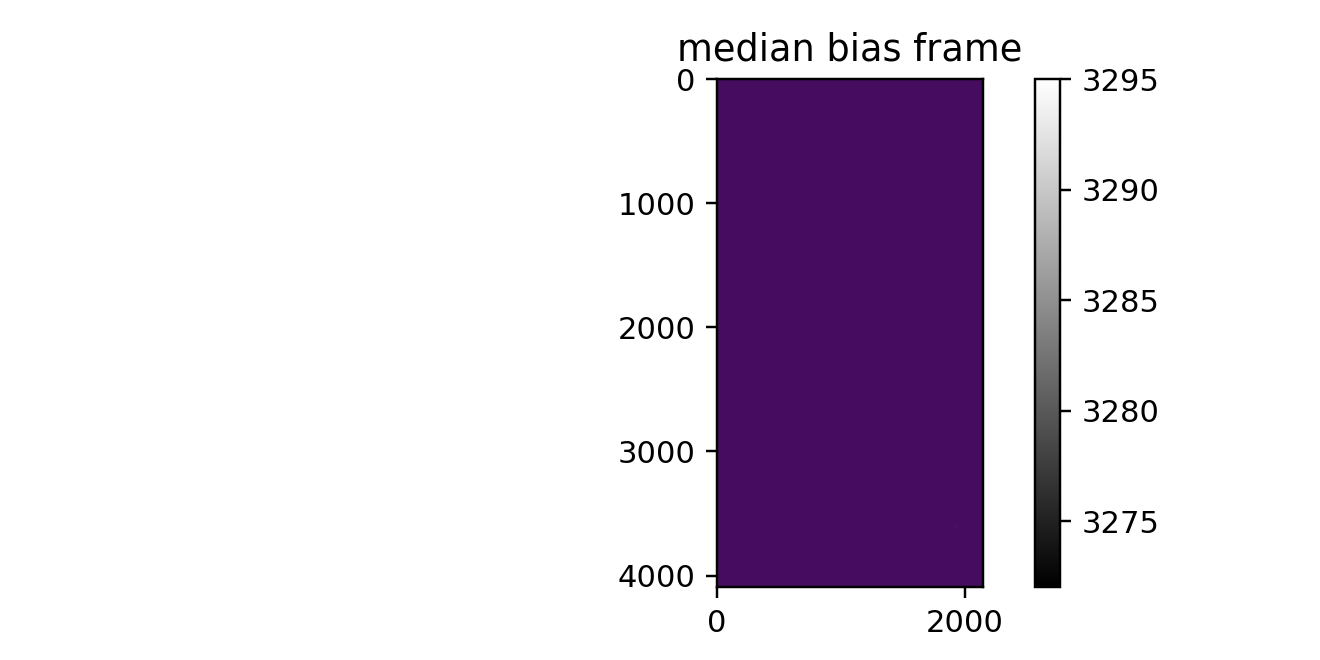

In [41]:
bias = kosmos.biascombine(biasfiles) 
print(bias.shape)

if DISPLAY:
    plt.figure(figsize=(6,3))
    plt.imshow(bias, origin='lower', aspect='auto', cmap=plt.cm.gray)
    plt.title('median bias frame')
    plt.clim(np.percentile(bias, (5, 98)))
    cb = plt.colorbar()

This doesn't look at all like the bias frame from `apo_05` example notebook...

Look at the details of `Combiner` . These are elements of `imtools.py`:


    


In [44]:
from ccdproc import Combiner
from astropy.nddata import CCDData
from astropy import units as u

bfiles = biasfiles
blist = []
# loop over all bias frames
for k in range(len(bfiles)):
    # read them in as CCD Data objects
    img = CCDData.read(bfiles[k], unit=u.adu)
    # append them to a big image list
    blist.append(img)

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


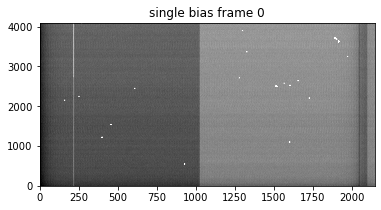

In [52]:
%matplotlib inline
plt.figure(figsize=(6,3))
i=0 
plt.imshow(blist[i], origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.title(f'single bias frame {i}')
plt.clim(np.percentile(blist[0], (5, 98)))

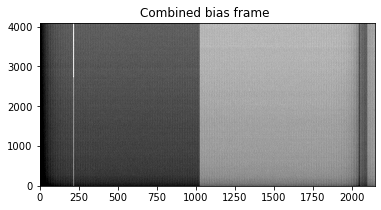

In [54]:
bias  = Combiner(blist).median_combine()
plt.figure(figsize=(6,3))
i=0 
plt.imshow(bias, origin='lower', aspect='auto', cmap=plt.cm.gray)
plt.title(f'Combined bias frame ')
plt.clim(np.percentile(bias, (5, 98)))


It doesn't look like what's in the example `apo_05` ... What am I doing wrong?  



# 2. Flat

In [56]:
dir = '/Users/chris/GradResearch/Q4DD02/UT221209/kosmos'
flatfiles = [os.path.join(dir,'flat.0003.fits')]

If I use the `bias` as combined above, we get an error:

In [69]:
# a wrapper around Combiner, the spectral response normalization, and the illumination correction
# this should work WITH or WITHOUT a bias given
flat, ilum = kosmos.flatcombine(flatfiles, bias=bias, trim=True, DATASEC='DSEC12'  ,
                               Saxis=1,)

ValueError: operands could not be broadcast together with shapes (4096,1124) (4096,2148) 

If we remove `bias`, we get the result below:

In [65]:
# a wrapper around Combiner, the spectral response normalization, and the illumination correction
# this should work WITH or WITHOUT a bias given
flat, ilum = kosmos.flatcombine(flatfiles, bias=False, trim=True, DATASEC='DSEC12'  ,
                               Saxis=1,)

Saxos=1, Waxis=0


/Users/chris/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [66]:
print(ilum.shape) # this is the indicies that are illuminated
print(flat.shape)
print(flat.unit)

(100,)
(2048, 100)
adu / s


(100,)
(2048, 100)
adu / s


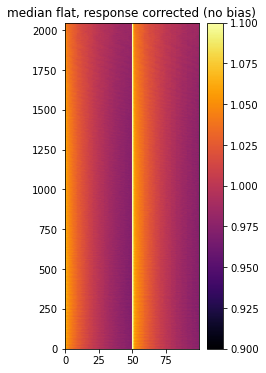

In [59]:
print(ilum.shape) # this is the indicies that are illuminated
print(flat.shape)
print(flat.unit)

#if DISPLAY:
plt.figure(figsize=(3,6))
plt.imshow(flat, origin='lower', aspect='auto', cmap=plt.cm.inferno)
plt.clim(.9,1.1)
plt.title('median flat, response corrected (no bias)')
cb = plt.colorbar()

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected. [astropy.wcs.wcs]


Saxos=0, Waxis=1
(2048, 1024)
adu / s


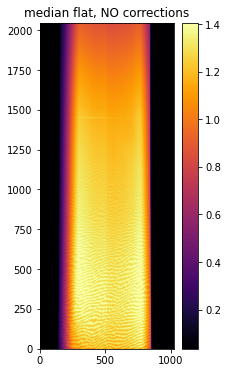

In [60]:
# if you turn off the illumination and response corrections, you just get a normalized median combined image
# i.e. could be used for photometry
medflat = kosmos.flatcombine(flatfiles, illumcor=False, responsecor=False, bias=None,
                             DATASEC='DSEC11' )
DISPLAY=True
if DISPLAY:
    plt.figure(figsize=(3,6))
    plt.imshow(medflat, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(np.percentile(medflat, (5, 98)))
    plt.title('median flat, NO corrections')
    cb = plt.colorbar()

print(medflat.shape)
print(medflat.unit)


Try to do the above steps by hand, since I don't think the dimensions read are correct... 

In [23]:
# how to read in any science or calibration frame w/ a spectrum present

sci = os.path.join(dir , 'PHL1412.0002.fits')  # spectrum of the one target star, Gl 669A
sciimg = kosmos.proc(sci, bias=None, ilum=ilum, flat=flat, trim=True,
                    DATASEC='DSEC11' )

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(3,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)


     

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


ValueError: operands could not be broadcast together with shapes (100,1024) (2048,100) 